In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
sscolumn = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
              "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]
ssmasterdf = pd.read_csv('adult.data', sep=", ",engine='python')
ssmasterdf.columns = sscolumn


In [3]:
import plotly.express as px
viz1=ssmasterdf[['sex','workclass','occupation','salary-range']]
d1=viz1[['sex','workclass','occupation','salary-range']].value_counts().reset_index(name="count")


In [4]:
fig=px.treemap(d1,path=['sex','workclass','occupation','salary-range'],values='count')
fig.show()


C:\Users\ssebast7\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
C:\Users\ssebast7\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
C:\Users\ssebast7\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
C:\Users\ssebast7\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [5]:
import plotly.express as px
viz2=ssmasterdf[['age','hours-per-week','education-num','salary-range']]
d1=viz2[['age','hours-per-week','education-num','salary-range']].value_counts().reset_index(name="count")

fig = px.scatter_3d(viz2, x='age', y='hours-per-week', z="education-num",
              color='salary-range')
fig.show()

[Text(0, 0.5, 'Percent'), Text(0.5, 0, 'race')]

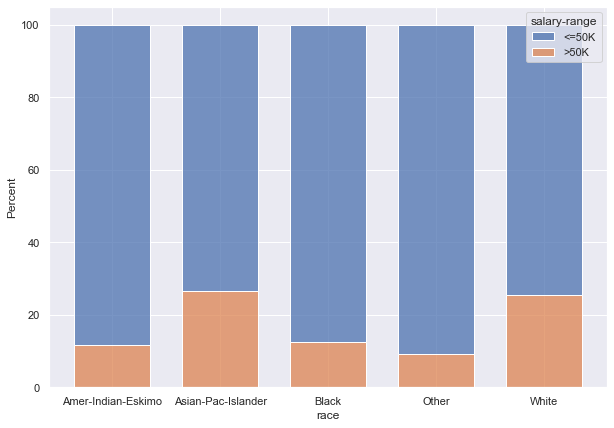

In [6]:
sns.set(rc={'figure.figsize':(10,7)})
plot = ssmasterdf.groupby(['race'])['salary-range'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(x = 'race' , hue = 'salary-range', weights= 'percent',multiple = 'stack',data=plot,shrink = 0.7)
g.set(ylabel="Percent",xlabel="race")

In [7]:
sslessthan50 = ssmasterdf[ssmasterdf["salary-range"] == "<=50K"].sample(n=7508)
ssgreaterthan50 = ssmasterdf[ssmasterdf["salary-range"] == ">50K"]
ssfinaldf = pd.concat([ssgreaterthan50, sslessthan50])
ssfinaldf['class'] = (ssfinaldf["salary-range"] == ">50K")*1

In [8]:
def ssplot_xy(ssaxes_,ssx,ssy,sstitle,sscolumn1,sscolumn2,colors=None):
  ssaxes_.scatter(ssx,ssy,c=colors)
  ssaxes_.set_title(sstitle)
  ssaxes_.set_xlabel(sscolumn1)
  ssaxes_.set_ylabel(sscolumn2)

In [9]:
def ssscatterplot(sscolumn1, sscolumn2, sscolumn3):
    plt.close()
    ssfig, ssaxes = plt.subplots(ncols=2, nrows=3, figsize=(20,20))
    ssfig.subplots_adjust(hspace=.5)
    
    ssx = sslessthan50[sscolumn1]
    ssy = sslessthan50[sscolumn2]
    ssplot_xy(ssaxes[0,0], ssx, ssy, "salary range <= 50K", sscolumn1, sscolumn2,['yellow'])
    
    ssx = ssgreaterthan50[sscolumn1]
    ssy = ssgreaterthan50[sscolumn2]
    ssplot_xy(ssaxes[0, 1], ssx, ssy, "salary range > 50K", sscolumn1, sscolumn2,['blue'])
    
    ssx = sslessthan50[sscolumn2]
    ssy = sslessthan50[sscolumn3]
    ssplot_xy(ssaxes[1, 0], ssx, ssy, "salary range <= 50K", sscolumn2, sscolumn3,['brown'])

    ssx = ssgreaterthan50[sscolumn2]
    ssy = ssgreaterthan50[sscolumn3]
    ssplot_xy(ssaxes[1, 1], ssx, ssy, "salary range > 50K", sscolumn2, sscolumn3,['green'])

    ssx = sslessthan50[sscolumn3]
    ssy = sslessthan50[sscolumn1]
    ssplot_xy(ssaxes[2, 0], ssx, ssy, "salary range <= 50K", sscolumn3, sscolumn1,['red'])
    
    ssx = ssgreaterthan50[sscolumn3]
    ssy = ssgreaterthan50[sscolumn1]
    ssplot_xy(ssaxes[2, 1], ssx, ssy, "salary range > 50K", sscolumn3, sscolumn1,['purple'])
    
    plt.show()

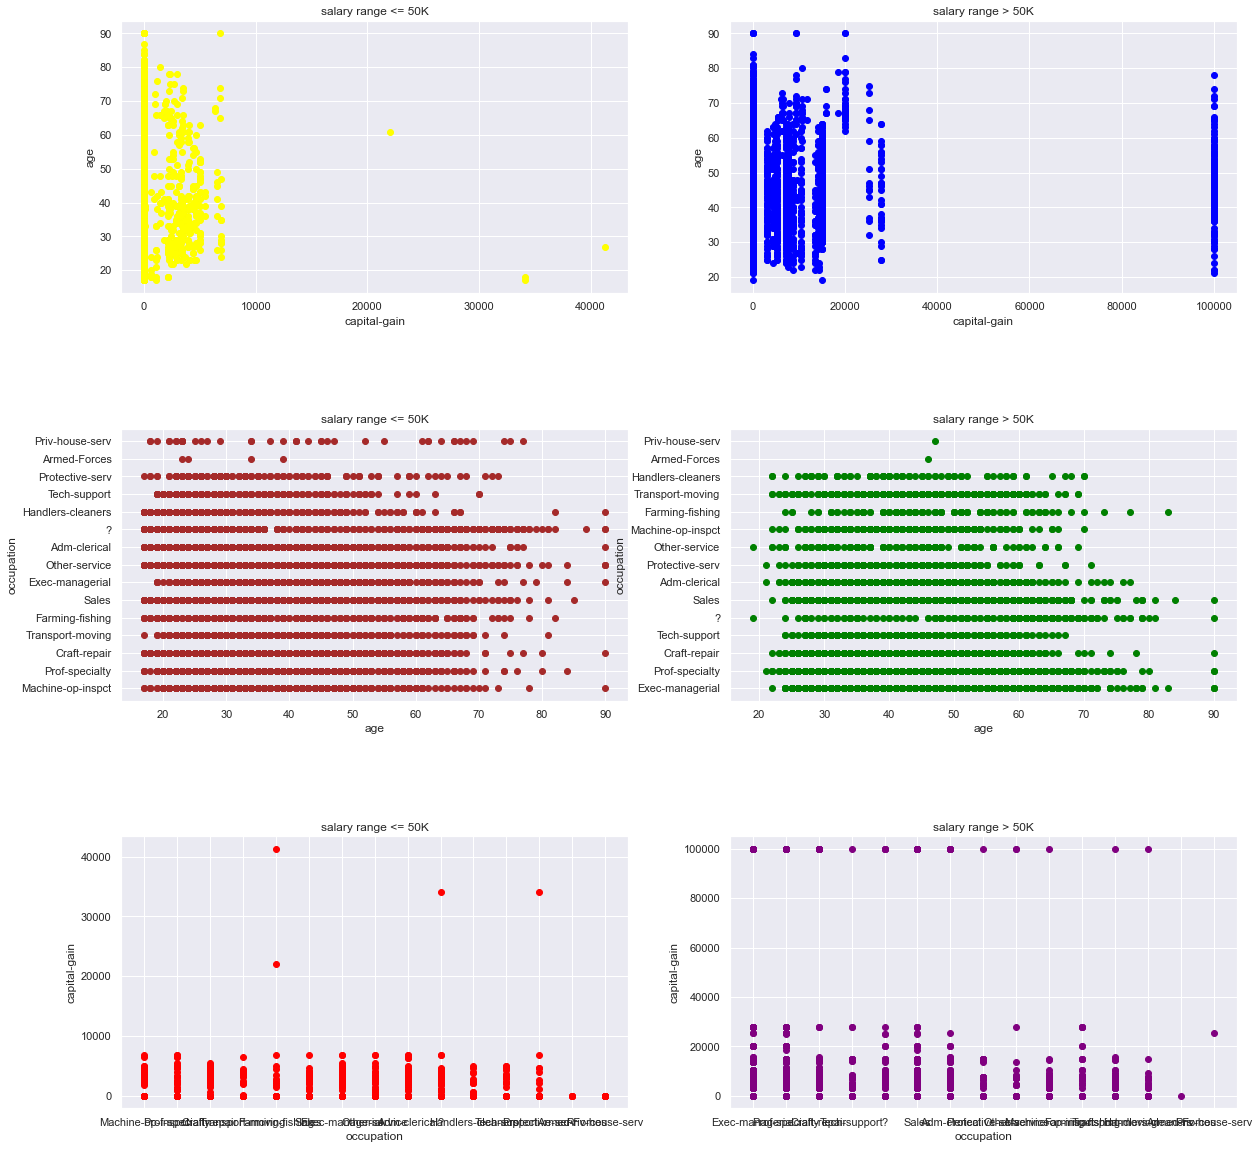

In [10]:
ssscatterplot('capital-gain','age', 'occupation')

In [11]:
def ssplotscatter_plotdiff(sscolumn1, sscolumn2, sscolumn3):
    plt.close()
    ssfig, ssaxes = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
    ssfig.subplots_adjust(hspace=.5)
    colors = ssfinaldf['class']
    colors = colors.apply(lambda x: 'pink' if x==0 else 'purple')
    ssx = ssfinaldf[sscolumn1]
    ssy = ssfinaldf[sscolumn2]
    ssplot_xy(ssaxes[0], ssx, ssy,"pink <=50K, purple >50K", sscolumn1, sscolumn2, colors)
    ssx = ssfinaldf[sscolumn2]
    ssy = ssfinaldf[sscolumn3]
    ssplot_xy(ssaxes[1], ssx, ssy,"pink <=50K, purple >50K", sscolumn2, sscolumn3, colors)
    ssx = ssfinaldf[sscolumn3]
    ssy = ssfinaldf[sscolumn1]
    ssplot_xy(ssaxes[2], ssx, ssy,"pink <=50K, purple >50K", sscolumn3, sscolumn1, colors)
    plt.show()

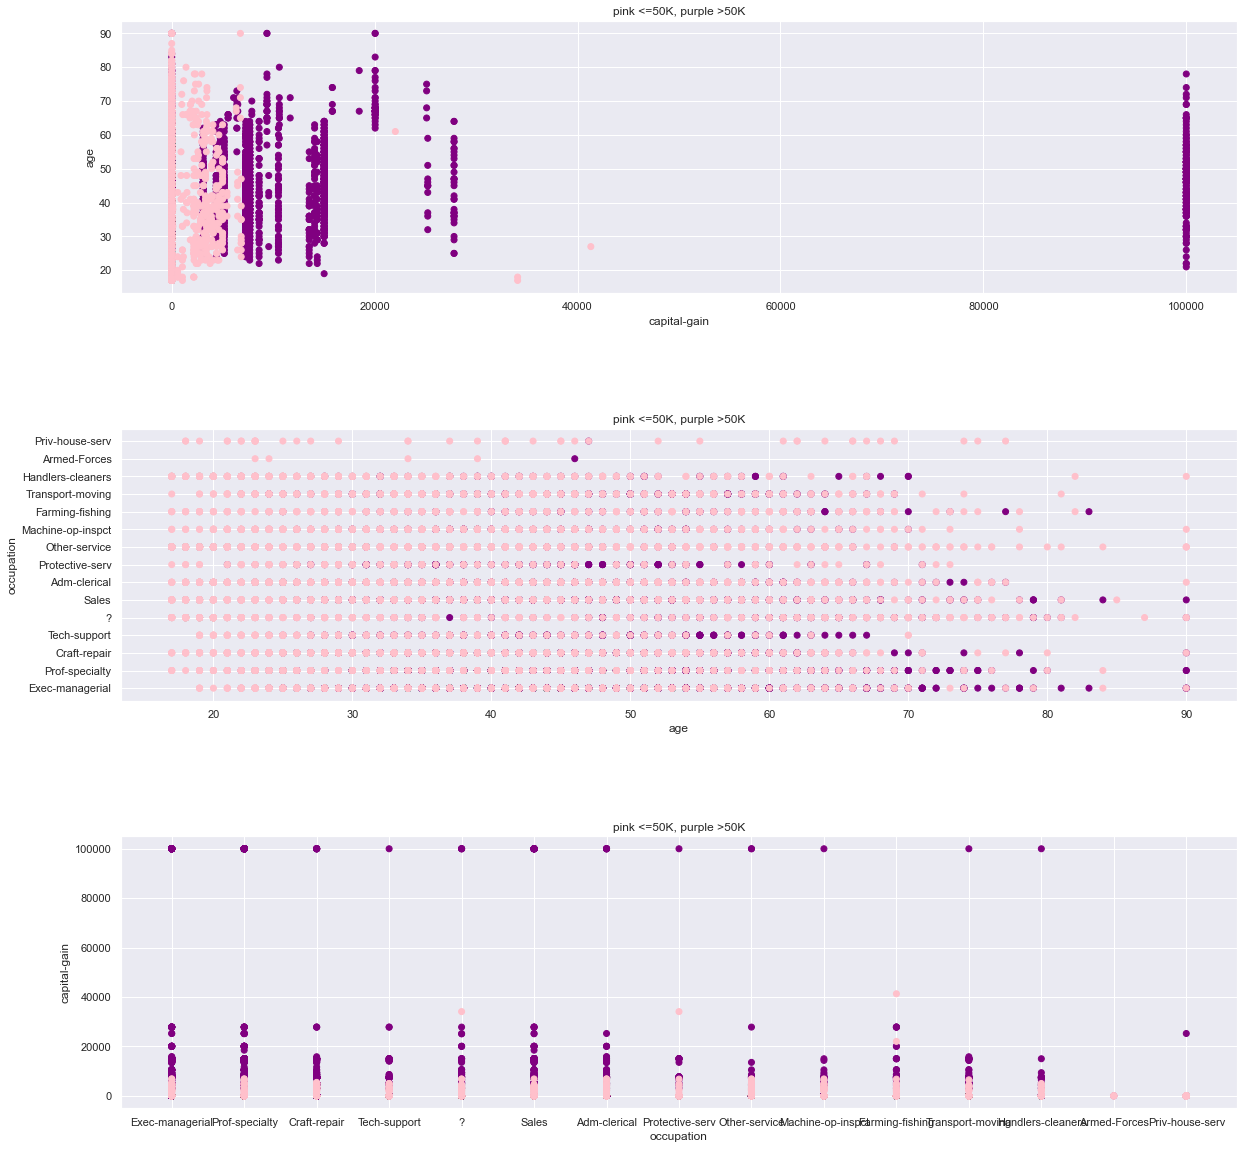

In [12]:
ssplotscatter_plotdiff('capital-gain', 'age', 'occupation')

In [13]:
def ssplotscattermatrix_lessthan50K(sscolumn1, sscolumn2, sscolumn3):
    plt.close()
    ssfig, ssaxes = plt.subplots(ncols=1, nrows=1, figsize=(10,6))
    ssfig.subplots_adjust(hspace=.5)
    ssdf = sslessthan50[[sscolumn1, sscolumn2, sscolumn3]]
    pd.plotting.scatter_matrix(ssdf, ax=ssaxes, color='blue', hist_kwds={'color':'green'}, marker='-', s=40)
    plt.suptitle("Salary range <=50K")
    plt.show()

C:\Users\ssebast7\AppData\Local\Temp\ipykernel_15696\2202439453.py:6: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



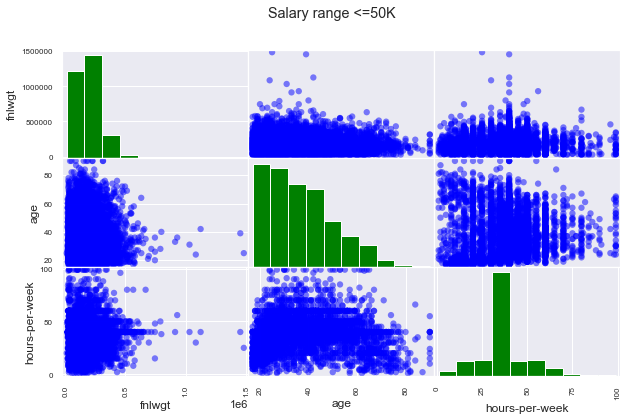

In [14]:
ssplotscattermatrix_lessthan50K('fnlwgt', 'age', 'hours-per-week')

In [15]:
def ssplotscattermatrix_greaterthan50K(sscolumn1, sscolumn2, sscolumn3):
    plt.close()
    ssfig, ssaxes = plt.subplots(ncols=1, nrows=1, figsize=(10,6))
    ssfig.subplots_adjust(hspace=.5)
    ssdf = ssgreaterthan50[[sscolumn1, sscolumn2, sscolumn3]]
    pd.plotting.scatter_matrix(ssdf, ax=ssaxes, color='orange', hist_kwds={'color':'blue'}, marker='-', s=40)
    plt.suptitle("Salary range >50K")
    plt.show()

C:\Users\ssebast7\AppData\Local\Temp\ipykernel_15696\1888854596.py:6: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



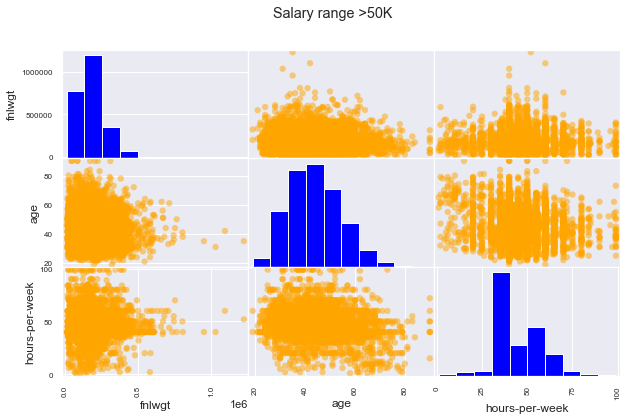

In [16]:
ssplotscattermatrix_greaterthan50K('fnlwgt', 'age', 'hours-per-week')

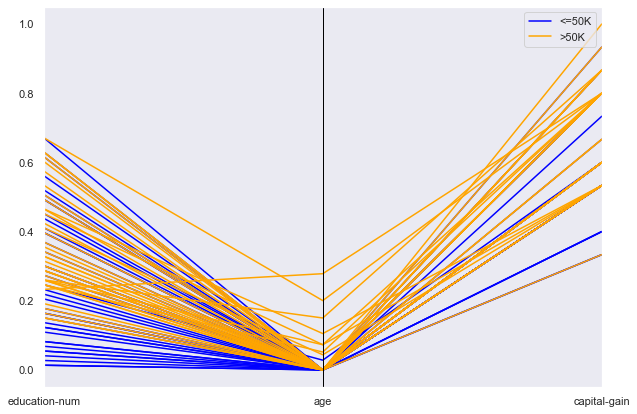

In [17]:
ssparalleldata = ssfinaldf[['education-num', 'age', 'capital-gain', 'class']].copy()
ssframenparray = MinMaxScaler().fit_transform(ssparalleldata.values)
ssparalleldata = pd.DataFrame(ssframenparray)
ssfinaldf.index = ssparalleldata.index
ssparalleldata['salary-range'] = ssfinaldf['salary-range']
ssparalleldata.columns = ['capital-gain', 'education-num', 'age', 'class', 'salary-range']
ssparalleldata_lessthan50 = ssparalleldata[ssparalleldata["class"] == 0.0].sample(n=40)
ssparalleldata_morethan50 = ssparalleldata[ssparalleldata["class"] == 1.0].sample(n=40) 
ssparalleldata = pd.concat([ssparalleldata_lessthan50, ssparalleldata_morethan50])
pd.plotting.parallel_coordinates(ssparalleldata, 'salary-range', cols=['education-num', 'age', 'capital-gain'], color=('blue',
                         'orange'))
plt.show()